Data Science Final Project-Statsticis Versus Salaries 
Kevin Trafford 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import seaborn as sns

Initial DataFrame:
    Rk                   Player   Age Team Pos     G    GS    MP    FG   FGA  \
0  1.0              Joel Embiid  29.0  PHI   C  39.0  39.0  33.6  11.5  21.8   
1  2.0              Luka Dončić  24.0  DAL  PG  70.0  70.0  37.5  11.5  23.6   
2  3.0    Giannis Antetokounmpo  29.0  MIL  PF  73.0  73.0  35.2  11.5  18.8   
3  4.0  Shai Gilgeous-Alexander  25.0  OKC  PG  75.0  75.0  34.0  10.6  19.8   
4  5.0            Jalen Brunson  27.0  NYK  PG  77.0  77.0  35.4  10.3  21.4   

   ...  TOV   PF   PTS      Salary  Unnamed: 31        Player2       Salary1  \
0  ...  3.8  2.9  34.7  51415938.0          NaN  Stephen Curry   55761217.00   
1  ...  4.0  2.1  33.9  43031940.0          NaN   Nikola Jokic  $51,415,938    
2  ...  3.4  2.9  30.4  48787676.0          NaN    Joel Embiid  $51,415,938    
3  ...  2.2  2.5  30.1  35859950.0          NaN   Kevin Durant  $51,179,020    
4  ...  2.4  1.9  28.7  24960001.0          NaN   Bradley Beal  $50,203,930    

   Unnamed: 34  Unn

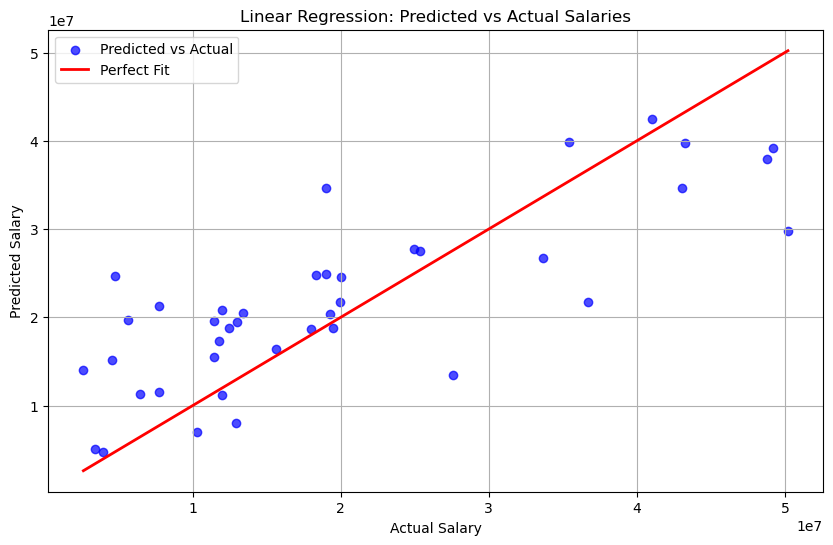

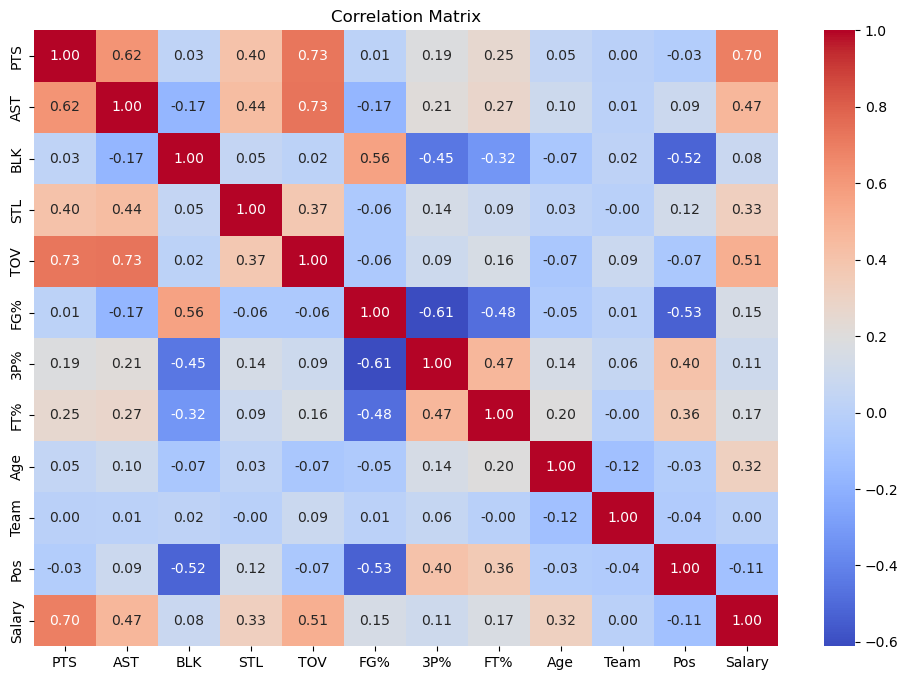

In [15]:
#Import the dataset using the CS that was created initially in Excel
df = pd.read_csv('Project_Data-Trafford.csv')

# Data Exploration-Display the first few rows of the dataframe to understand its structure,
# Use the head function to display first few rows 
# Check for missing values
print("Initial DataFrame:")
print(df.head())

print("\nMissing Values:")
print(df.isnull().sum())

# Data Cleaning- Drop columns that are not needed
# Drop rows that are missing needed values
# Replace blanks with zeroes
# Encode Categorical Data using ordinal encoder
df = df.drop(columns=['Unnamed: 31', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Player2', 'Salary1'])

df = df.dropna(subset=['Player', 'Age', 'Team', 'Pos', 'Salary'])
 
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

df[numerical_cols] = df[numerical_cols].fillna(0)

encoder = OrdinalEncoder()
categorical_cols = ['Team', 'Pos']
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])

# Select features as all relevant satistics and target variable as Salary

features = ['PTS', 'AST', 'BLK', 'STL', 'TOV', 'FG%', '3P%', 'FT%', 'Age', 'Team', 'Pos']
X = df[features]
y = df['Salary']

# Split the data into trainign and testing usein train_test_split function
# Scale the data using StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and print correlation matricx 
correlation_matrix = df[features + ['Salary']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Train the modle using the linear Regression tool
# USe model to predict salaries on the test set
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train)

y_pred = linear_regressor.predict(X_test_scaled)

# Evaluate the model by calculating the r squared value
r2 = linear_regressor.score(X_test_scaled, y_test)

print("\nLinear Regression Model Evaluation:")
print(f"R-squared: {r2}")

# Print visualizations of the model as well as the correlation matrix

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Fit')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Linear Regression: Predicted vs Actual Salaries')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix')
plt.show()